# COSC 3337 - Practice 5 - Ujwal Joshi

### About The Data

Our goal for this lab is to construct a model that can take a certain set of features related to the Titanic and predict whether a person survived or not (0 or 1). Since we're trying to predict a binary categorical variable (1 or 0), logistic regression seems like a good place to start from.

The dataset that we'll be using for this task comes from [kaggle.com](https://www.kaggle.com/c/titanic/data) and contains the following attributes:

- PassengerId
- Survived (0 or 1)
- Pclass: Ticket class (1, 2, or 3 where 3 is the lowest class)
- Name
- Sex
- Age: Age in years
- SibSp: # of siblings / spouses aboard the Titanic
- Parch: # of parents / children aboard the Titanic
- Ticket: Ticket number
- Fare: Passenger fare
- Cabin: Cabin number
- Embarked: Port of Embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)

Note before starting: Please refer back to the matplotlib lab if you're having trouble creating any graphs up to this point. You're free to use any library to create your graphs, so don't feel like you need to match this code 100%

### Exploratory Data Analysis

Let's begin by importing some necessary libraries that we'll be using to explore the data.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 15, 5
sns.set_style('darkgrid')

Our first step is to load the data into a pandas DataFrame

In [3]:
titanic_data = pd.read_csv('titanic.csv')
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# Modified Work
titanic_data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


From here, it's always a good step to use `describe()` and `info()` to get a better sense of the data and see if we have any missing values.

In [6]:
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
# Modified Work
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

We can see that Age, Cabin, and Embarked contain missing values since this dataset contains 891 entries in total, and Age, Cabin, and Embarked only contain 714 non-null entries, 204 non-null entries, and 889 non-null entries respectively. Thus, we will have to take care of these missing values.

In [8]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
# Modified Work
unique_vals_titanic_data = pd.DataFrame({
    'Unique Value Count': titanic_data.apply(lambda col: len(col.unique())),
    'Unique Values': titanic_data.apply(lambda col: col.unique())
})

unique_vals_titanic_data

,Unique Value Count,Unique Values
PassengerId,891,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
Survived,2,"[0, 1]"
Pclass,3,"[3, 1, 2]"
Name,891,"[Braund, Mr. Owen Harris, Cumings, Mrs. John B..."
Sex,2,"[male, female]"
Age,89,"[22.0, 38.0, 26.0, 35.0, nan, 54.0, 2.0, 27.0,..."
SibSp,7,"[1, 0, 3, 4, 2, 5, 8]"
Parch,7,"[0, 1, 2, 5, 3, 4, 6]"
Ticket,681,"[A/5 21171, PC 17599, STON/O2. 3101282, 113803..."
Fare,248,"[7.25, 71.2833, 7.925, 53.1, 8.05, 8.4583, 51...."


Note, we can also make a plot of our missing data if we'd prefer to visualize it. Here we use seaborn's barplot `sns.barplot(x, y)` and pass our DataFrame's columns as the x axis and the sum of all missing values in each column in the y axis. since Embarked only has 2 missing values, it's very hard to see, but there's a slight raise in the y axis under Embarked.

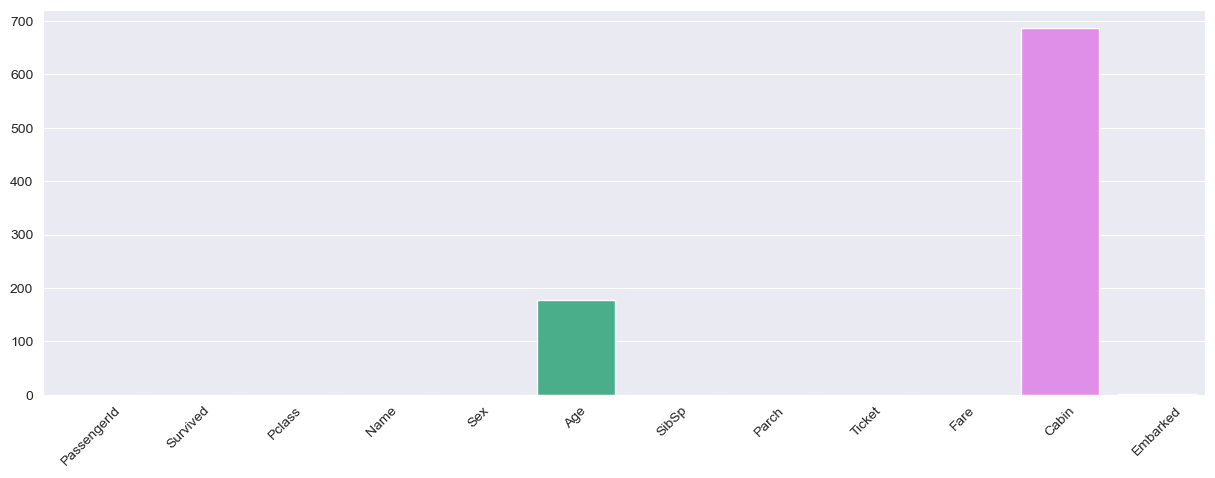

In [9]:
sns.barplot(x=titanic_data.columns, y=titanic_data.isnull().sum().values)
plt.xticks(rotation=45)
plt.show()

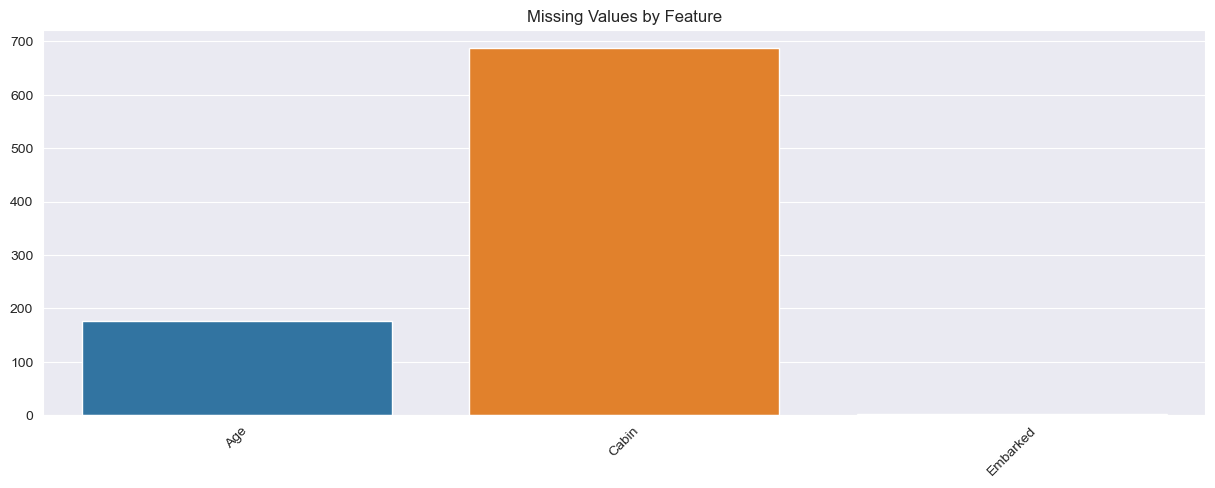

In [21]:
# Modified Work
null_cols = titanic_data.columns[titanic_data.isnull().any()]

sns.barplot(x=null_cols, y=titanic_data[null_cols].isnull().sum().values)
plt.xticks(rotation=45)
plt.title("Missing Values by Feature")
plt.show()

Tip: If you're ever confused how a chained line of code works in this course, just break it down into multiple steps. For example, say you didn't know how the piece of code above 'y=titanic_data.isnull().sum().values' gives us all of the missing values. Well, let's break it down. `titanic_data.isnull()` gives us back the original DataFrame (titanic_data), but with True and False values placed where there is a missing value.

In [22]:
titanic_data.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


Then calling `.sum()` off of this gives us back a Series telling us how many true (missing values) were in each column. Recall that True is an alias for 1, which is why we can take the sum of True False columns.

In [23]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Finally, if you remember from lab 3, calling .index on this will give us the index labels (left side), and .values will give us the missing value counts for each column (right side), which is the array that we passed in as y.

In [24]:
titanic_data.isnull().sum().values

array([  0,   0,   0,   0,   0, 177,   0,   0,   0,   0, 687,   2],
      dtype=int64)

Keep this tip in mind when exploring other people's notebooks on github or kaggle, since you'll soon find out that it's very common on kaggle for people to chain functions together, which can sometimes be hard to understand at first, but much easier to understand once you break it down into smaller chunks.  
  
Let's continue on with our data exploration by next seeing how many people survived (1) and did not survive (0) in our dataset. To accomplish this, we can pass any column in our DataFrame into `sns.countplot(x)`, which will list all of the unique values in that column along the x-axis, and plot the total counts for each unique value along the y-axis. So here we can see that majority of the people in our dataset did not survive (0).

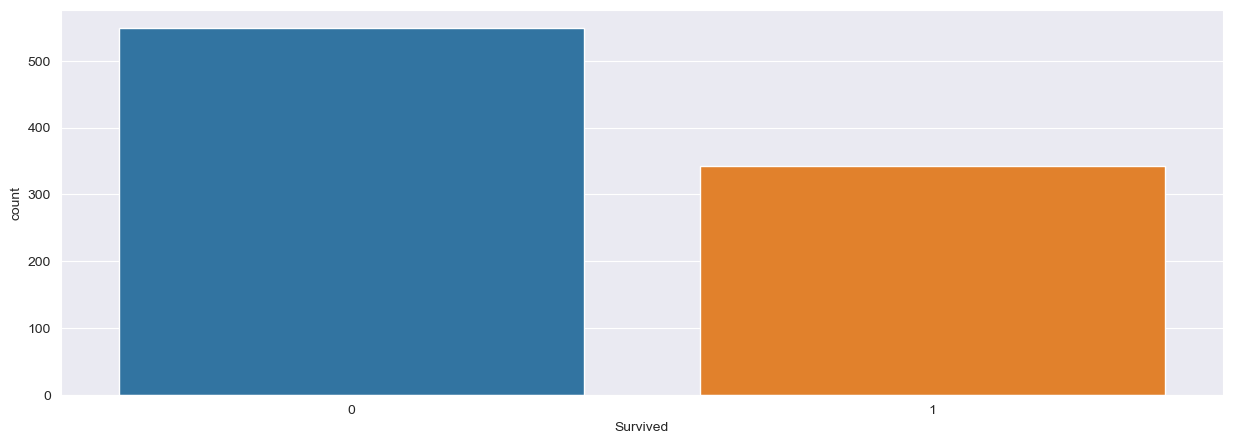

In [25]:
sns.countplot(x=titanic_data['Survived'])
plt.show()

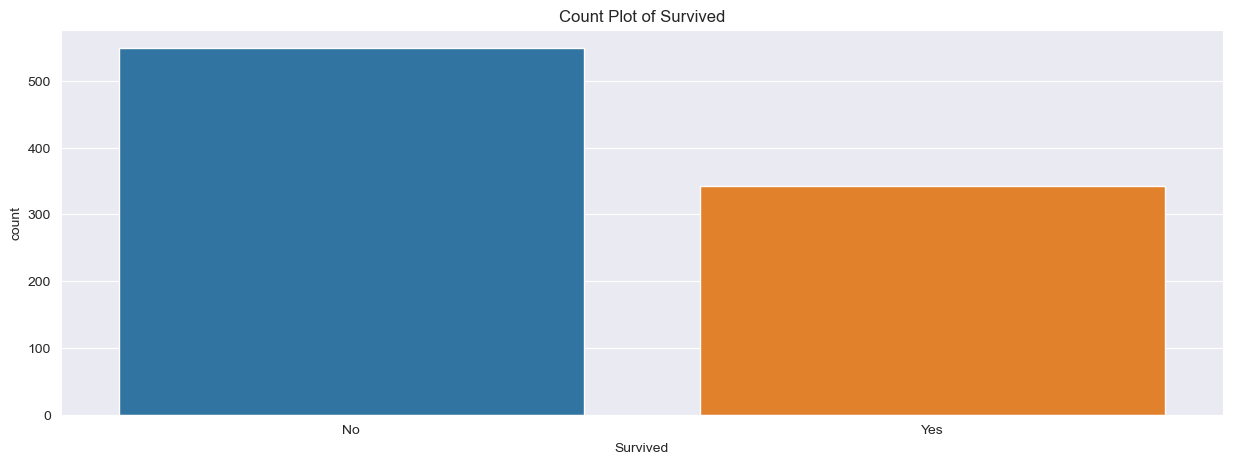

In [29]:
# Modified Work
sns.countplot(x=titanic_data['Survived'])
plt.title('Count Plot of Survived')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])
plt.show()

Did more men or females survive? Recall that `hue` parameter seaborn gives us access too. This will let us expand on the previous graph by also telling us how many from each value (0 or 1) were male and female.

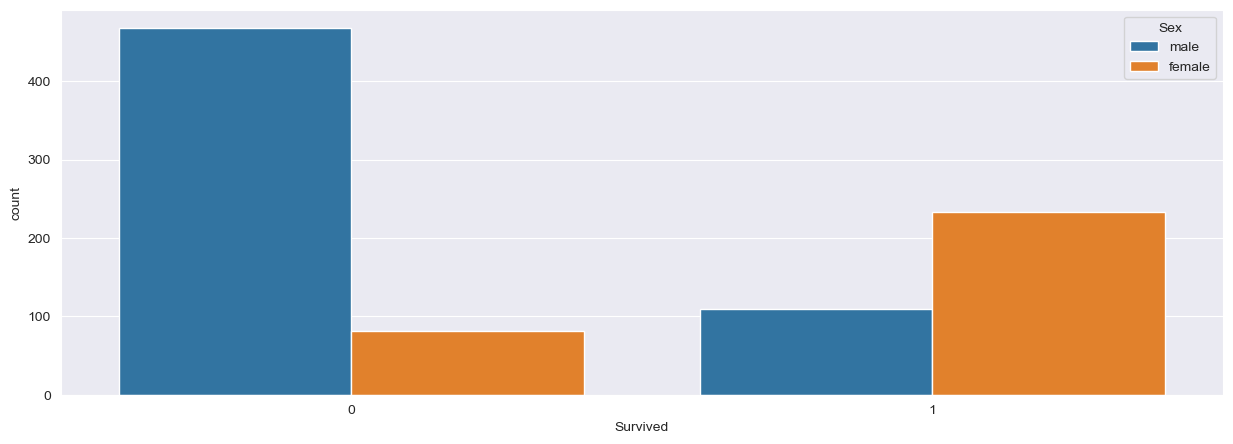

In [30]:
sns.countplot(x=titanic_data['Survived'], hue='Sex', data=titanic_data)
plt.show()

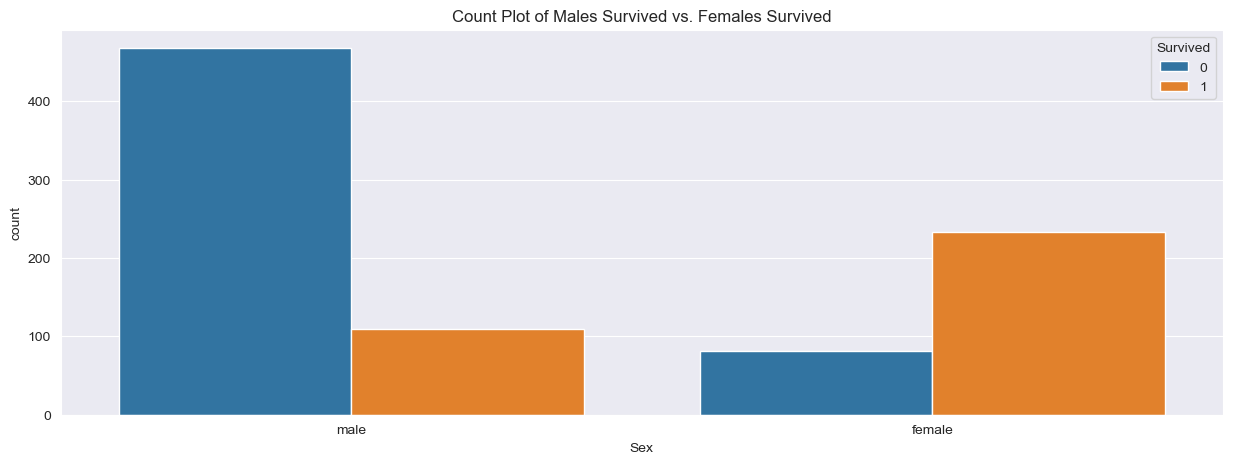

In [36]:
# Modified Plot (reversed x & y)
sns.countplot(titanic_data, x="Sex", hue="Survived")
plt.title('Count Plot of Males Survived vs. Females Survived')
plt.show()

Interpretation: We can see that from those who did not survive (0), majority of them were male.

How about from ticket class? Was the lower class less likely to survive?

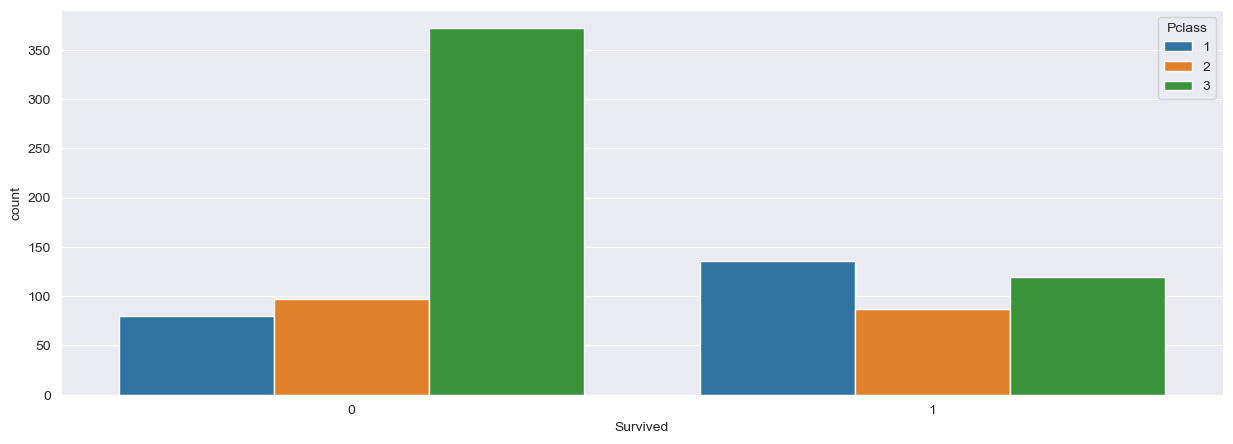

In [37]:
sns.countplot(x=titanic_data['Survived'], hue='Pclass', data=titanic_data)
plt.show()

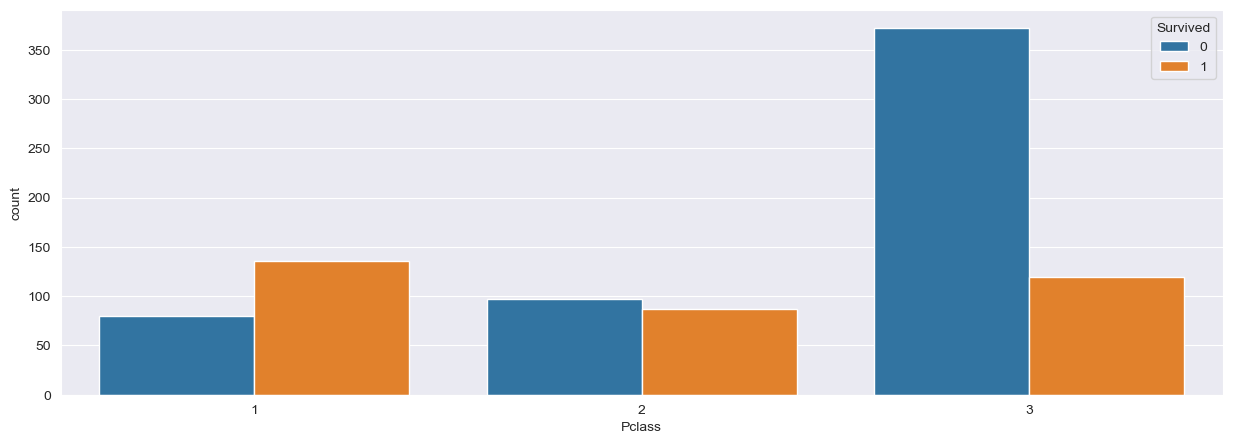

In [38]:
# Modified Work
sns.countplot(x=titanic_data['Pclass'], hue='Survived', data=titanic_data)
plt.show()

Interpretation: We can see that from those who did not survive (0), majority of them were from the lower class, 3.

What did the Titanic age distribution look like?

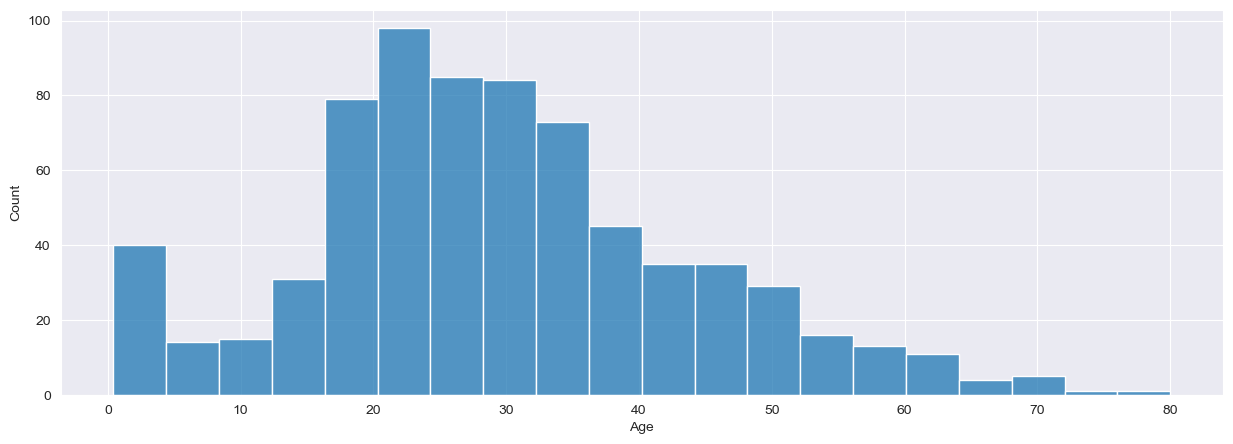

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [39]:
sns.histplot(x=titanic_data['Age'].dropna())
plt.show()
titanic_data['Age'].describe()

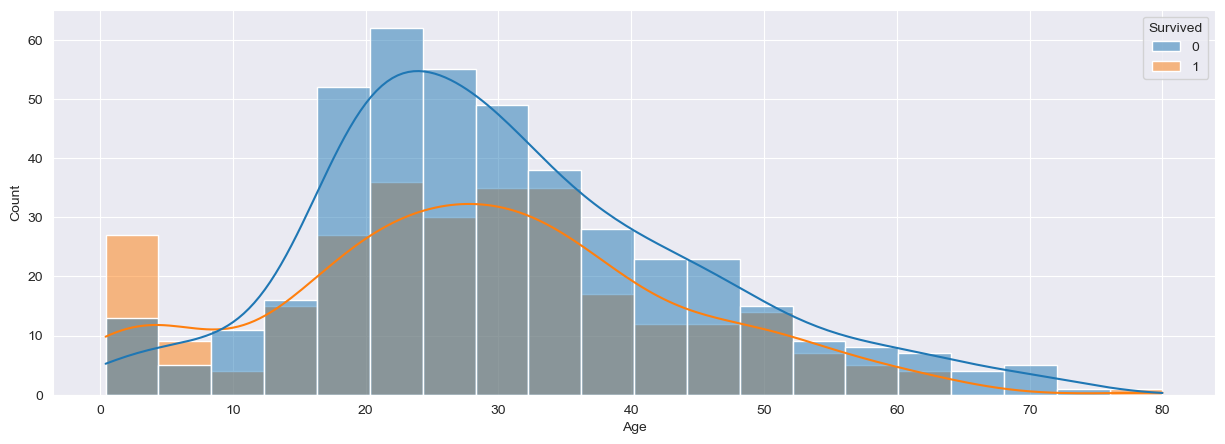

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [41]:
# Modified Work
sns.histplot(x=titanic_data['Age'].dropna(), kde=True, hue=titanic_data['Survived'])
plt.show()
titanic_data['Age'].describe()

Interpretation: The average age on the Titanic seems to be ~30, with 75% of people onboard being 38 years of age or younger.

What's the most common number of siblings one had with them on the Titanic?

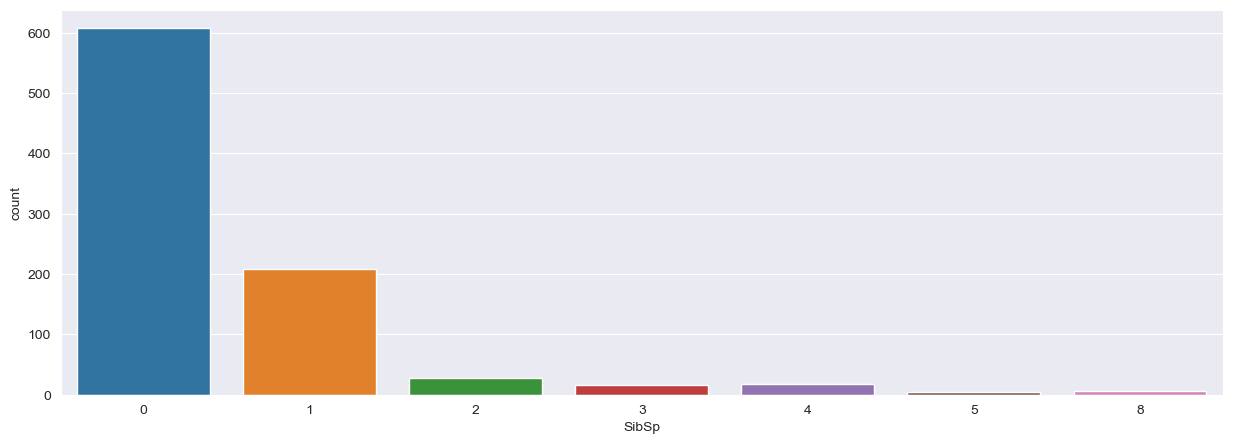

In [42]:
sns.countplot(x=titanic_data['SibSp'])
plt.show()

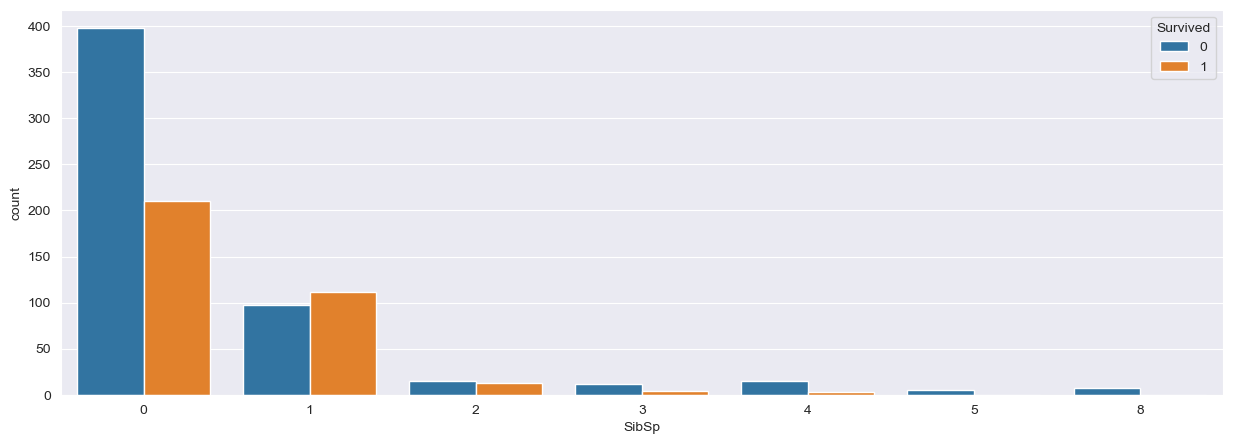

In [43]:
# Modified Work
sns.countplot(x=titanic_data['SibSp'], hue=titanic_data['Survived'])
plt.show()

Interpretation: Majority of those onboard had 0 siblings/spouses also onboard, with the 2nd most popular being having 1 sibling/spouse onboard (most likely that 1 person onboard was a spouse).

What was the Fare distribution on the Titanic? How much did the average person pay?

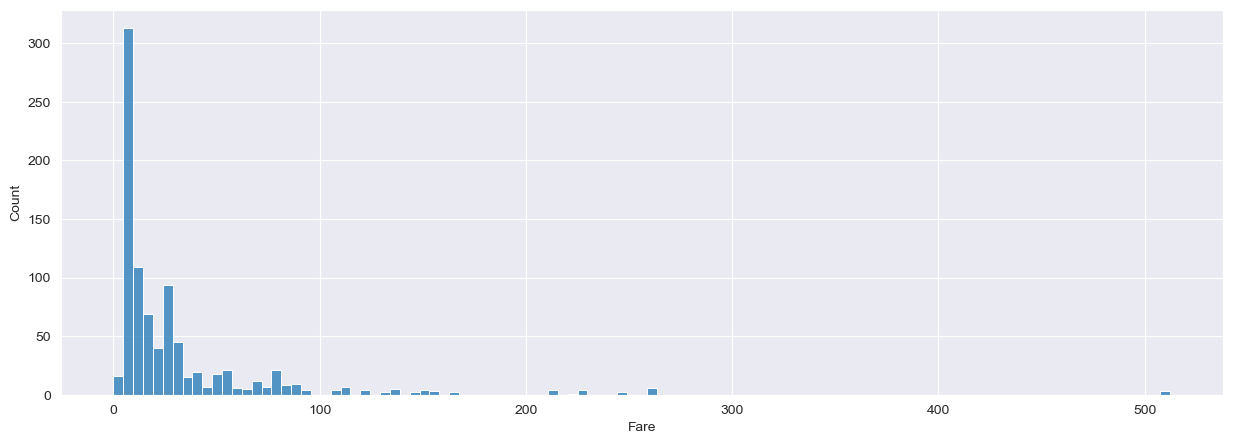

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [44]:
sns.histplot(x=titanic_data['Fare'])
plt.show()
titanic_data['Fare'].describe()

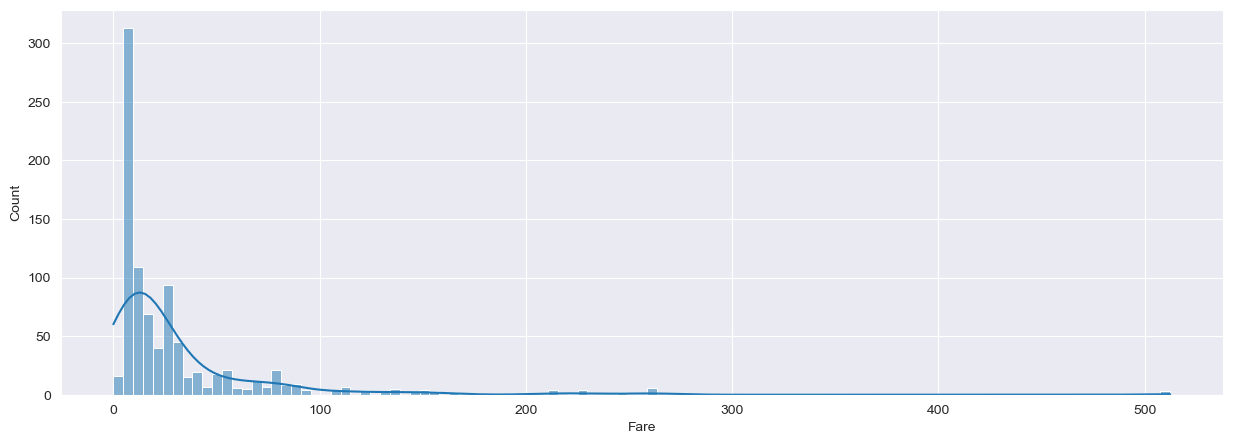

In [46]:
# Modified Work
sns.histplot(x=titanic_data['Fare'], kde=True)
plt.show()

Interpretation: The average person paid 32.204208, with 75% of people paying 31.000000 or less. One interesting note is that the min is 0. This could mean that there were people unaccounted for who managed to sneak in for free. Or someone who won a free ride or something.

### Data Preprocessing
Let's first take care of our missing values. Recall how much data was missing:

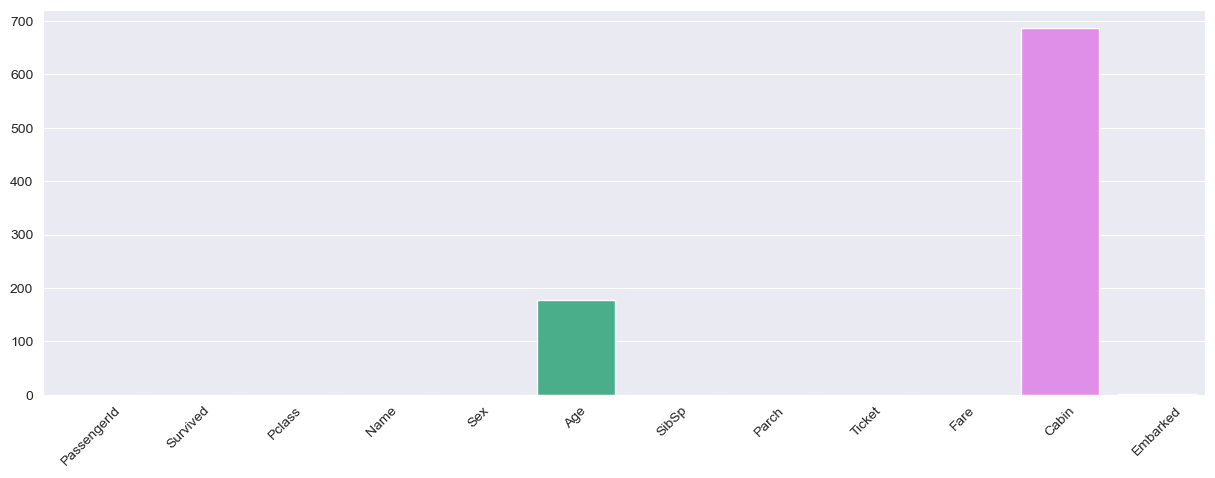

In [10]:
sns.barplot(x=titanic_data.columns, y=titanic_data.isnull().sum().values)
plt.xticks(rotation=45)
plt.show()

For Age, our best bet would be to impute any missing values with the mean age. We can do this very quickly with pandas `.apply(func)`. This will apply any function to every value along a column. If you're not familiar with lambda functions, you can create a normal python function that accepts the age and mean_age, and returns the mean age if age is null, or the age itself if it's not null. Then you can supply that function to `.apply(func)`. So here we're reassigning the titanic_data['Age'] column to titanic_data['Age'] after our function has been applied on it, which will essentially fill any missing age values with the mean age calculated.

In [11]:
mean_age = int(titanic_data['Age'].mean())
titanic_data['Age'] = titanic_data['Age'].apply(lambda age : mean_age if pd.isnull(age) else age)

In [50]:
# Modified Work
titanic_data['Age'].fillna(mean_age)

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    29.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

If we recreate our missing data plot, we can see that there are no longer any missing Age values.

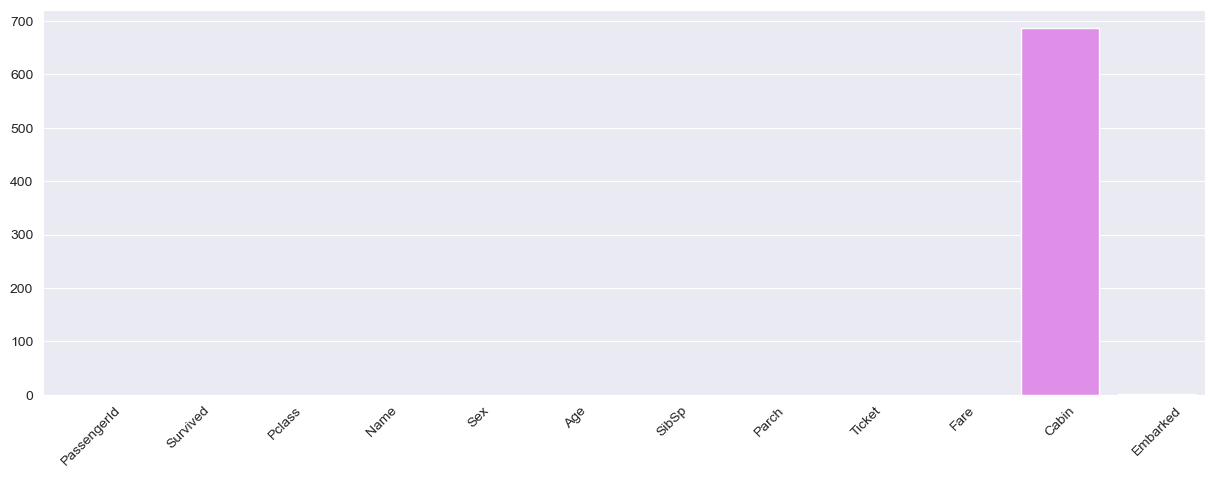

In [12]:
sns.barplot(x=titanic_data.columns, y=titanic_data.isnull().sum().values)
plt.xticks(rotation=45)
plt.show()

For Cabin, we have so much data missing (more missing than non-null data) that performing any type of imputation seems like a bad idea since we don't have much original data to work with. For this reason, we will just drop this column. I will go ahead and also drop the 2 missing Embarked rows while we're at it, but you can choose to keep them if you'd like and impute them.

In [13]:
titanic_data.drop(labels=['Cabin'], axis=1, inplace=True)
titanic_data.dropna(inplace=True)

Recalling `.info()`, we can see that there are no more missing values in this dataset.

In [14]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


Our next step is to handle categorical variables since machine learning algorithms can only understand numbers. The variables to consider are Name, Sex, Ticket, and Embarked. We'll use dummy variables for Sex and Embarked and drop Name and Ticket. You can choose to do some type of feature engineering on Name and Ticket and compare it with our model without these features if you wish.

Recall that a dummy variable is a variable that takes the value 0 or 1 to indicate the absence or presence of some category. Pandas has a convenient function `pd.get_dummies(data, columns)` that will automatically assign dummy variables for us. For example, if we include Sex in columns, it will create 2 new columns (sex_male, sex_female) and place a 1 for the one that's true, and 0 in the other. So if a specific observation is female, we will place a 1 in sex_female and 0 in sex_male. One important note is that you should always add an additional `drop_first=True` parameter when using get_dummies. This will drop one of the columns created in the dummy process, since keeping all of them will result in multicollinearity.

In [15]:
titanic_data = pd.get_dummies(data=titanic_data, columns=['Sex', 'Embarked'], drop_first=True)
titanic_data.drop(labels=['Name','Ticket'], axis=1, inplace=True)

Now that our data is in the correct form, we're ready to begin building our model.

In [16]:
titanic_data.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,22.0,1,0,7.2500,True,False,True
1,2,1,1,38.0,1,0,71.2833,False,False,False
2,3,1,3,26.0,0,0,7.9250,False,False,True
3,4,1,1,35.0,1,0,53.1000,False,False,True
4,5,0,3,35.0,0,0,8.0500,True,False,True


In [17]:
# Modified Work
unique_vals_titanic_data_preprocessed = pd.DataFrame({
    'Unique Value Count': titanic_data.apply(lambda col: len(col.unique())),
    'Unique Values': titanic_data.apply(lambda col: col.unique())
})

unique_vals_titanic_data_preprocessed

,Unique Value Count,Unique Values
PassengerId,889,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
Survived,2,"[0, 1]"
Pclass,3,"[3, 1, 2]"
Age,88,"[22.0, 38.0, 26.0, 35.0, 29.0, 54.0, 2.0, 27.0..."
SibSp,7,"[1, 0, 3, 4, 2, 5, 8]"
Parch,7,"[0, 1, 2, 5, 3, 4, 6]"
Fare,247,"[7.25, 71.2833, 7.925, 53.1, 8.05, 8.4583, 51...."
Sex_male,2,"[True, False]"
Embarked_Q,2,"[False, True]"
Embarked_S,2,"[True, False]"


### Creating our Logistic Regression Model

We're now ready to begin creating and training our model. We first need to split our data into training and testing sets. This can be done using sklearn's `train_test_split(X, y, test_size)` function. This function takes in your features (X), the target variable (y), and the test_size you'd like (Generally a test size of around 0.3 is good enough). It will then return a tuple of X_train, X_test, y_train, y_test sets for us. We will train our model on the training set and then use the test set to evaluate the model.

In [18]:
from sklearn.model_selection import train_test_split

X = titanic_data[['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare','Sex_male', 'Embarked_Q',
                        'Embarked_S']]
y = titanic_data['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [19]:
# Modified Work (80 20 split)
X2_train, X2_test, y2_train, y2_test = train_test_split(X, y, test_size=0.2)

We'll now import sklearn's LogisticRegression model and begin training it using the `fit(train_data, train_data_labels)` method. In a nutshell, fitting is equal to training. Then, after it is trained, the model can be used to make predictions, usually with a `predict(test_data)` method call.

In [20]:
from sklearn.linear_model import LogisticRegression

logmodel = LogisticRegression(max_iter=1000)
logmodel.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [21]:
# Modified Work
logmodel2 = LogisticRegression(max_iter=1500)
logmodel2.fit(X2_train, y2_train)

LogisticRegression(max_iter=1500)

### Model Evaluation

Now that we've finished training, we can make predictions off of the test data and evaluate our model's performance using the corresponding test data labels (y_test).

In [22]:
predictions = logmodel.predict(X_test)

In [23]:
# Modified Work
predictions2 = logmodel2.predict(X2_test)

Since we're now dealing with classification, we'll import sklearn's `classification_report` and `confusion_matrix` to evaluate our model. Both of these take the true values and predictions as parameters.

In [24]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       0.86      0.87      0.87       174
           1       0.75      0.74      0.75        93

    accuracy                           0.82       267
   macro avg       0.81      0.80      0.81       267
weighted avg       0.82      0.82      0.82       267

[[151  23]
 [ 24  69]]


In [25]:
# Modified Work
print(classification_report(y2_test, predictions2))
print(confusion_matrix(y2_test, predictions2))

              precision    recall  f1-score   support

           0       0.86      0.84      0.85       117
           1       0.70      0.74      0.72        61

    accuracy                           0.80       178
   macro avg       0.78      0.79      0.78       178
weighted avg       0.81      0.80      0.80       178

[[98 19]
 [16 45]]


Not bad 🙂! We could certainly do better, but we'll leave it up to you to mess around with the data some more and see what you can imporove on. You can also check out the actual kaggle competition with the full Titanic dataset and compete on there with your classmates. [Kaggle competitions](https://www.kaggle.com/c/titanic) are great for testing your new datascience skills.